<a href="https://colab.research.google.com/github/6k5wyi/DataScience-With-Crawlering/blob/main/%EC%9C%A0%ED%8A%9C%EB%B8%8C_%EB%9E%AD%ED%82%B9_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유튜브 랭킹 데이터 시각화 하기

## Colab에서 matplotlib 실행시 한글 안나오는 문제 해결 방법
다음을 실행시킨뒤, 런타임 -> 런타임 다시시작 누르기

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 12
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


다음을 실행하여 테스트 해보기

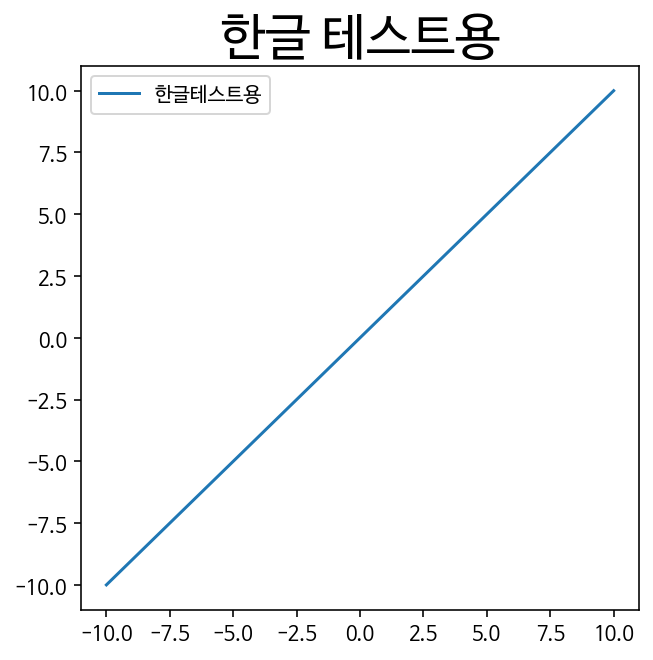

In [2]:
plt.figure(figsize=(5,5))
plt.plot([-10,10], [-10,10], label='한글테스트용')
plt.title("한글 테스트용", size = 25)
plt.legend()
plt.show()

## 사전작업

### Colab에서 실행시 실행시켜야 할 부분

In [3]:
!pip install selenium 
!apt-get update # apt install을 정확히 실행하기 위해 ubuntu 업데이트 
!apt install chromium-chromedriver 
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 
import sys 
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver') 
from selenium import webdriver 
chrome_options = webdriver.ChromeOptions() 
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument('--disable-dev-shm-usage') 
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (137 kB/s)
Reading package lists... Done
Reading package lists... Done
Building

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


### local에서 실행시 실행시켜야할 부분

In [4]:
# from selenium import webdriver
# installedwebdriver = 'c:/Temp/chromedriver.exe' #웹드라이버 설치 경로 설정
# browser = webdriver.Chrome(installedwebdriver) 

## 라이브러리 추가하기

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## 엑셀파일 불러오기

In [10]:
#엑셀파일 다운 주소 : https://github.com/6k5wyi/DataScience-With-Crawlering/blob/main/files/youtube_rank.xlsx?raw=true
df = pd.read_excel('./youtube_rank.xlsx')
df.head()

,타이틀,카테고리,구독자수,View수,비디오갯수
0,BLACKPINK,[음악/댄스/가수],5460만,140억9744만,331개
1,Big Hit Labels,[음악/댄스/가수],4930만,135억5263만,483개
2,BANGTANTV,[음악/댄스/가수],4220만,61억7663만,"1,377개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2550만,189억8418만,"3,617개"


## 데이터 살펴보기

In [11]:
df.tail()

,타이틀,카테고리,구독자수,View수,비디오갯수
995,급식걸즈,[취미/라이프],40만,2억3901만,226개
996,OCN,[TV/방송],40만,3억4583만,"10,071개"
997,Bravo jamoasi,[미분류],40만,6193만,25개
998,덕출 : DCTVGO,[TV/방송],40만,8249만,202개
999,San E,[TV/방송],40만,2496만,268개


In [12]:
df['구독자수'][0:10]

0    5460만
1    4930만
2    4220만
3    2650만
4    2550만
5    2280만
6    2150만
7    1950만
8    1850만
9    1820만
Name: 구독자수, dtype: object

In [14]:
# "만" 이라는 글자를 숫자 0000으로 대체하기
df['구독자수'].str.replace('만','0000')[0:10]

0    54600000
1    49300000
2    42200000
3    26500000
4    25500000
5    22800000
6    21500000
7    19500000
8    18500000
9    18200000
Name: 구독자수, dtype: object

## 구독자수변환 Series 문자열 변경하기

In [15]:
df['구독자수변환'] = df['구독자수'].str.replace('만','0000')
df.head()

,타이틀,카테고리,구독자수,View수,비디오갯수,구독자수변환
0,BLACKPINK,[음악/댄스/가수],5460만,140억9744만,331개,54600000
1,Big Hit Labels,[음악/댄스/가수],4930만,135억5263만,483개,49300000
2,BANGTANTV,[음악/댄스/가수],4220만,61억7663만,"1,377개",42200000
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000
4,SMTOWN,[음악/댄스/가수],2550만,189억8418만,"3,617개",25500000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   타이틀     1000 non-null   object
 1   카테고리    1000 non-null   object
 2   구독자수    1000 non-null   object
 3   View수   1000 non-null   object
 4   비디오갯수   1000 non-null   object
 5   구독자수변환  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [17]:
df['구독자수변환'] = df['구독자수변환'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   타이틀     1000 non-null   object
 1   카테고리    1000 non-null   object
 2   구독자수    1000 non-null   object
 3   View수   1000 non-null   object
 4   비디오갯수   1000 non-null   object
 5   구독자수변환  1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


## 카테고리별 구독자수, 채널 수 피벗 테이블 생성하기 

In [18]:
pivot_df= df.pivot_table(index = '카테고리',values= '구독자수변환',aggfunc= ['sum','count'])
pivot_df.head()

,sum,count
,구독자수변환,구독자수변환
카테고리,,
[BJ/인물/연예인],86660000,68
[IT/기술/컴퓨터],6450000,8
[TV/방송],198240000,162
[게임],75100000,101
[교육/강의],19580000,23


## 데이터 프레임 칼럼 명 변경

In [19]:
pivot_df.columns = ['구독자수 합','카테고리 수']
pivot_df.head()

,구독자수 합,카테고리 수
카테고리,,
[BJ/인물/연예인],86660000,68
[IT/기술/컴퓨터],6450000,8
[TV/방송],198240000,162
[게임],75100000,101
[교육/강의],19580000,23


## 데이터 프레임 인덱스 초기화

In [20]:
pivot_df = pivot_df.reset_index()
pivot_df.head()

,카테고리,구독자수 합,카테고리 수
0,[BJ/인물/연예인],86660000,68
1,[IT/기술/컴퓨터],6450000,8
2,[TV/방송],198240000,162
3,[게임],75100000,101
4,[교육/강의],19580000,23


## 데이터 프레임 내림차순 정렬하기

In [21]:
pivot_df = pivot_df.sort_values(by='구독자수 합',ascending=False)
pivot_df.head()

,카테고리,구독자수 합,카테고리 수
12,[음악/댄스/가수],577150000,175
17,[키즈/어린이],264140000,94
2,[TV/방송],198240000,162
11,[음식/요리/레시피],143870000,88
0,[BJ/인물/연예인],86660000,68


## 카테고리별 구독자 수 시각화

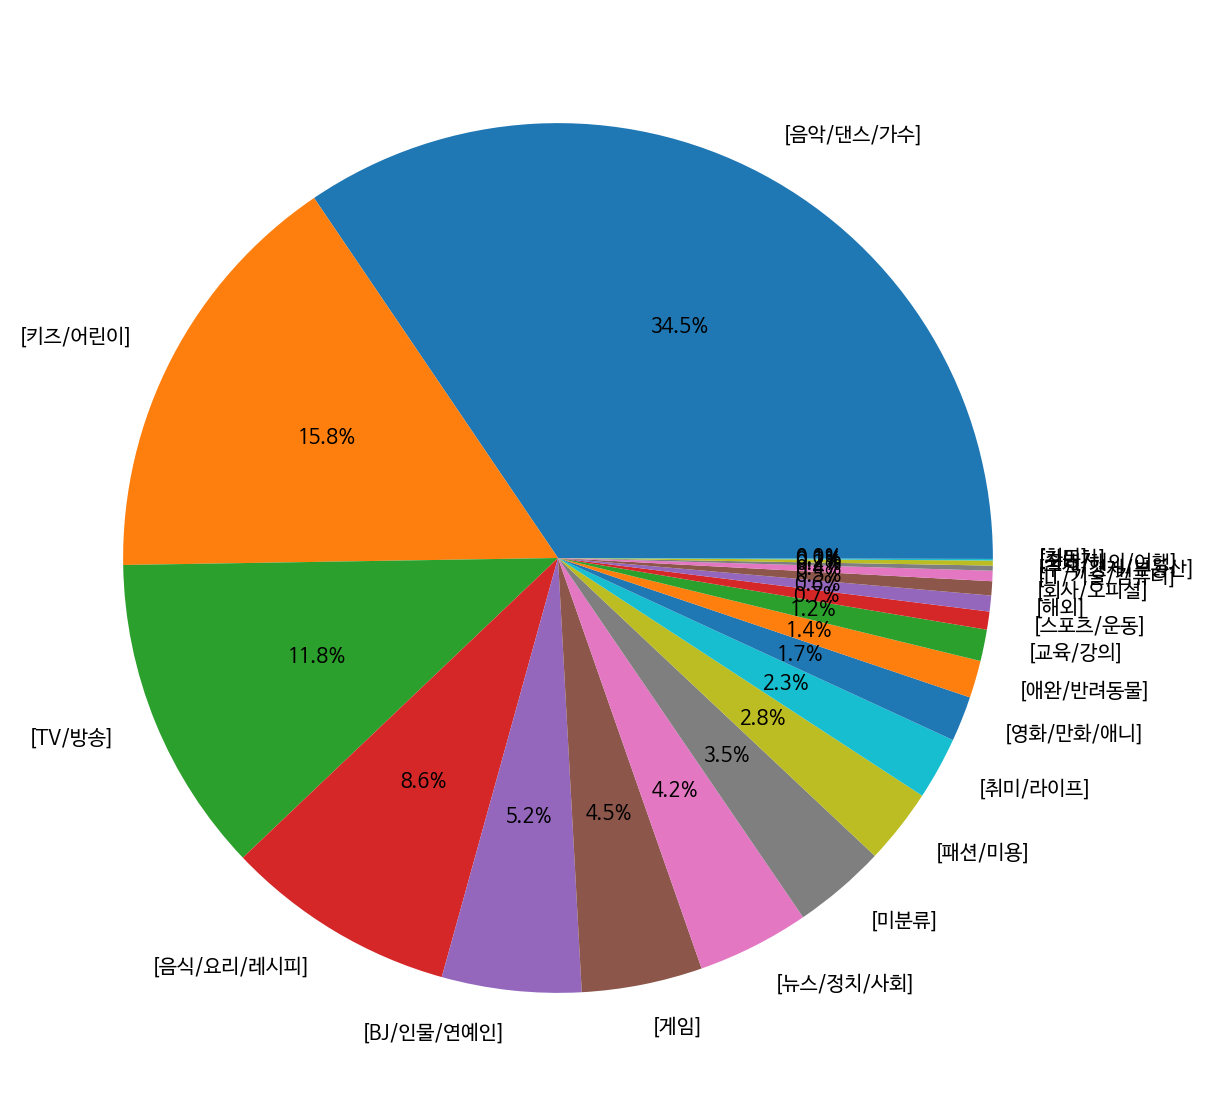

In [22]:
plt.figure(figsize=(30,10))
plt.pie(pivot_df['구독자수 합'],labels=pivot_df['카테고리'],autopct='%1.1f%%')
plt.show()